## How has the Global Representation of Baseball Players changed over time? What countries produce the most baseball players in number? What countries have showed the highest increase and Highest Decline in players in the last 15 years.

#### Visualizing The Data

We were able to use Apache Spark to Extract the Data needed to answer our questions related to the Global Representation of Major League Baseball players, and the growth of the Sport over the Past 15 years. We can now visualize these, so it is easier to see Data Trends. We used Apache Spark to export data to pandas data frames, and csv files. We can now visualize these dataframes using plot functionality built into pandas, that is based on matplotlib.  

In [71]:
# Import the necessary libraries to visualize a pandas data frame
# Read the raw data from csv files

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [72]:
df_raw = pd.read_csv('spark_question1_global_change_last_15.csv', index_col=2)
print (df_raw.filter(items=['country2016', 'countNum2016', 'countNum2001', 'diff', 'percentChange']))

             countNum2016  countNum2001  diff  percentChange
country2016                                                 
Germany                 4             1     3     300.000000
D.R.                  134           109    25      22.935780
Nicaragua               3             2     1      50.000000
Curacao                 4             2     2     100.000000
Cuba                   30            15    15     100.000000
Panama                  6            10    -4     -40.000000
Venezuela             102            50    52     104.000000
USA                   967           899    68       7.563960
South Korea             9             3     6     200.000000
Mexico                 15            17    -2     -11.764706
Aruba                   1             3    -2     -66.666667
P.R.                   26            53   -27     -50.943396
CAN                    13            13     0       0.000000
V.I.                    2             2     0       0.000000
Japan                   

#### Bar Chart Showing Player Representation Change from 2001 to 2016
We filter the Country of Origin, and the Change in player representation from our pandas dataframe. We then plot a bar chart showing the Change in Player representation by country from 2001 to 2016. The Data shows that the United States had the greatest increase in number of players (68), with Venezuela in second (52). Puerto Rico showed the greates decline in Numbers (-27)

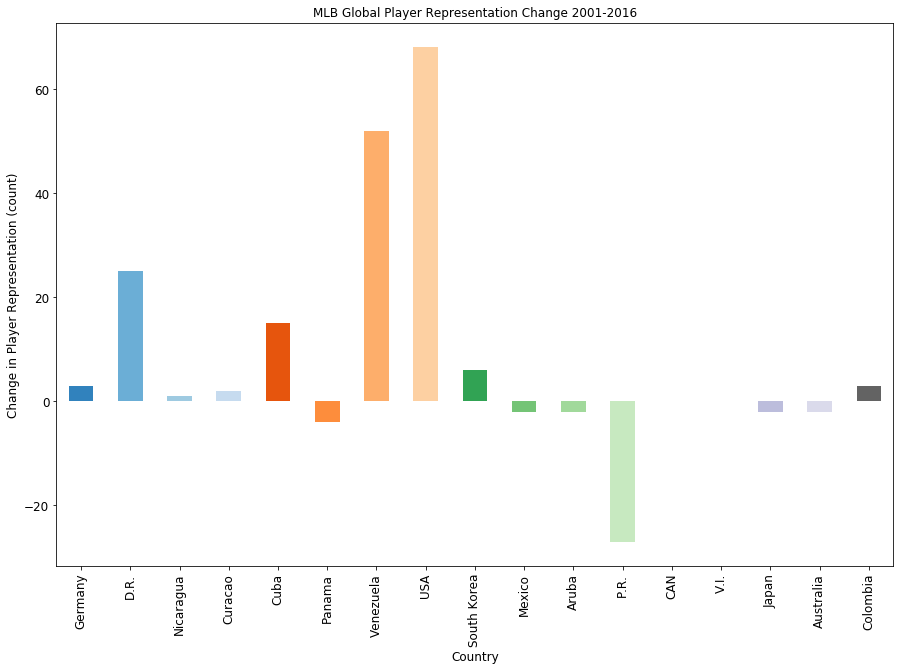

In [73]:
# Extract only the columns we need
df = df_raw.filter(items=['country2016', 'diff'])

# Color Scale
color_list = plt.cm.tab20c(np.linspace(0,1,20))

# Plot a bar chart, and label the axes
ax = df['diff'].plot(kind='bar', title ="MLB Global Player Representation Change 2001-2016", color=color_list, figsize=(15, 10), fontsize=12)
ax.set_xlabel("Country", fontsize=12)
ax.set_ylabel("Change in Player Representation (count)", fontsize=12)
plt.show()


#### Bar Chart Showing Player Representation Change Percentage from 2001 to 2016

We can also visualize the Change in Number of players, as a percentage. This highlights countries where the sport may be growing rapidly, as opposed to countries where the sport is already established and may be growing more slowly. Germany and Colombia show large growth, however that is based on the fact that they had very low representation in 2001. Venezuela shows the greatest significant increase over the past 15 years (104%). Aruba shows the greatest numerical percentage decrease, over this time period, due to the fact that they had low representation in 2001 and 2016. Puerto Rico on the other hand shows the greatest significant percentage decrease over this time period (-51%) 

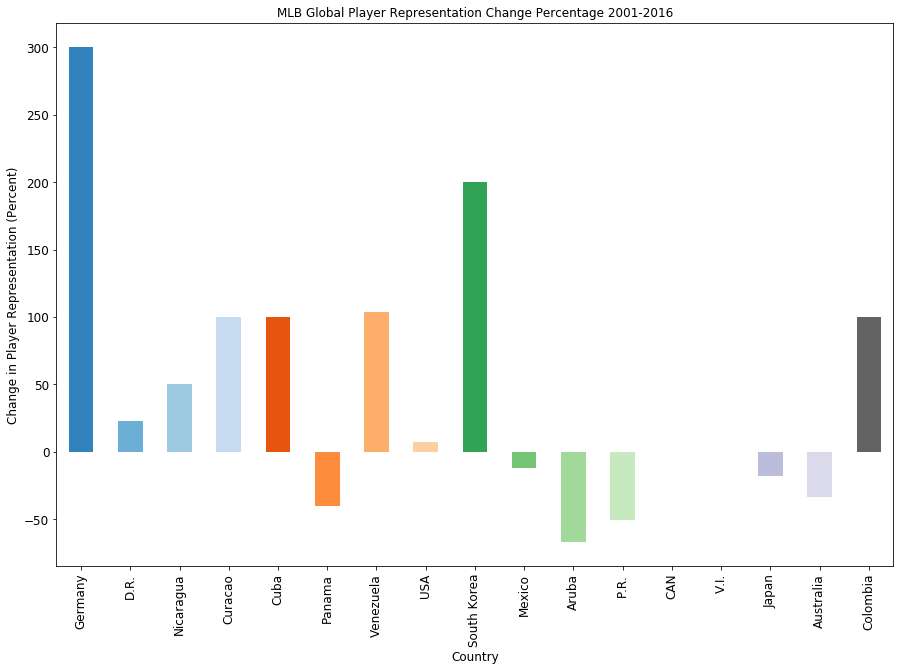

In [74]:
# Extract only the columns we need
df = df_raw.filter(items=['country2016', 'percentChange'])

# Color Scale
color_list = plt.cm.tab20c(np.linspace(0,1,20))

# Plot a bar chart, and label the axes
ax = df['percentChange'].plot(kind='bar', title ="MLB Global Player Representation Change Percentage 2001-2016", color=color_list, figsize=(15, 10), fontsize=12)
ax.set_xlabel("Country", fontsize=12)
ax.set_ylabel("Change in Player Representation (Percent)", fontsize=12)
plt.show()

#### Tracking the Growth of Baseball in Latin America from 2001 to 2016
We can track the growth of Baseball in Latin American countries, where the sport is popular, by looking at the Number of Major League Baseball players from some of thes countries from 2001 to 2016. We extract dataframes showing the number of players represented by Venezuela, the Dominican Republic, Puerto Rico and Cuba for the years between 2001 and 2016.

In [75]:
# Read in data that shows each Countries major league baseball representation for the past 15 year. 
# Extract individual axes for each country whose data we wish to plot. 

df_lam =  pd.read_csv('spark_question1_last_15.csv')

ven_ax =  df_lam.loc[df_lam['birthCountry'] == 'Venezuela'].rename(index=str, columns={"count":"Venezuela"})
dr_ax =  df_lam.loc[df_lam['birthCountry'] == 'D.R.'].rename(index=str, columns={"count":"Dominican Rep."})
pr_ax = df_lam.loc[df_lam['birthCountry'] == 'P.R.'].rename(index=str, columns={"count":"Puerto Rico"})
cub_ax = df_lam.loc[df_lam['birthCountry'] == 'Cuba'].rename(index=str, columns={"count":"Cuba"})


#### Line Chart Showing Growth of Baseball in Latin America 2001 to 2016 
We can visualize the growth by plotting a line chart, that shows the number of Major League Baseball players from Venezuela, Dominican Republic, Puerto Rico and Cuba every year from 2001 to 2016. 

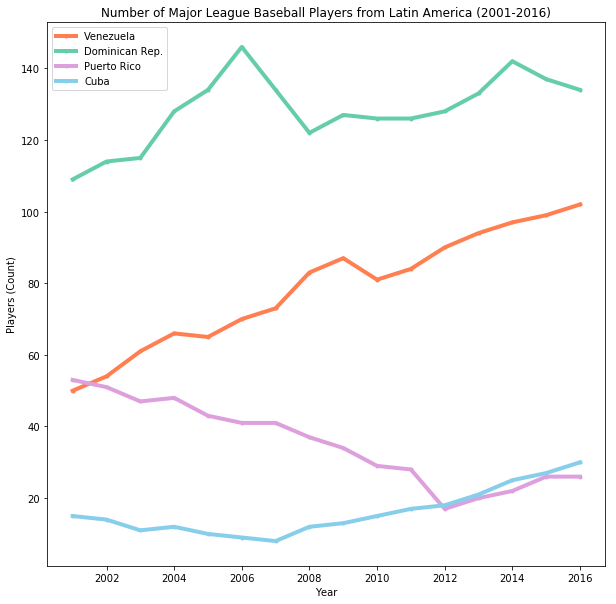

In [76]:


plt.close("all")
plt.title("Number of Major League Baseball Players from Latin America (2001-2016)")
plt.ylabel("Players (Count)")
plt.xlabel("Year")
plt.plot( ven_ax['yearID'], ven_ax['Venezuela'], marker='.', markersize=6, color='Coral', linewidth=4)
plt.plot( dr_ax['yearID'], dr_ax['Dominican Rep.'], marker='.', markersize=6, color='MediumAquamarine', linewidth=4)
plt.plot( pr_ax['yearID'], pr_ax['Puerto Rico'], marker='.', markersize=6, color='Plum', linewidth=4)
plt.plot( cub_ax['yearID'], cub_ax['Cuba'], marker='.', markersize=6, color='SkyBlue', linewidth=4)
plt.legend()

plt.show()

